# 📞 Mobile Plan Profitability and Usage Analysis  (Megaline) #

**Proyecto:** Análisis de rentabilidad y comportamiento por plan móvil
**Autor:** Carlos Arturo Crespo Smith
**Fecha:** Junio 2025

*Descripción del Proyecto:*
Este proyecto se centra en el **análisis del comportamiento de los clientes y la determinación de la tarifa de prepago más rentable (Surf vs. Ultimate)** para el operador de telecomunicaciones Megaline. Utilizando un conjunto de datos que incluye información de 500 clientes sobre su uso de llamadas, mensajes e internet, se investiga cómo estos patrones de consumo impactan en los ingresos generados por cada plan. El proyecto aborda el desafío de trabajar con datos brutos, incluyendo la necesidad de preprocesamiento, y aplica técnicas de análisis exploratorio y pruebas estadísticas para validar hipótesis de negocio.

*🎯 Objetivos Clave:*
- **Preprocesamiento y Limpieza de Datos:** Preparar y estandarizar datos de múltiples fuentes (usuarios, llamadas, mensajes, internet y planes) para asegurar su calidad y consistencia.
- **Ingeniería de Características:** Calcular el uso mensual de servicios (minutos, mensajes, GB) y derivar el ingreso total generado por cada cliente, incluyendo los costos por excedentes.
- **Análisis Exploratorio de Datos (EDA):** Comparar el comportamiento de uso y los ingresos entre los planes tarifarios Surf y Ultimate, identificando tendencias y distribuciones clave.
- **Prueba de Hipótesis Estadística:** Validar si existen diferencias significativas en los ingresos promedio entre los planes y entre distintas regiones geográficas.
- **Recomendaciones de Negocio:** Proporcionar insights basados en datos para ayudar al departamento comercial a ajustar el presupuesto de publicidad y optimizar las estrategias de tarifas.

*🛠️ Habilidades Demostradas:*
- **Python:** Dominio en la manipulación de DataFrames (pandas) para la integración, agregación y transformación de datos.
- **Análisis Exploratorio de Datos (EDA):** Capacidad para inspeccionar, resumir y visualizar datos para descubrir patrones y anomalías.
- **Preprocesamiento de Datos:** Experiencia en la gestión de valores ausentes, corrección de tipos de datos y estandarización de columnas en conjuntos de datos diversos.
- **Estadística Aplicada:** Habilidad para formular y ejecutar pruebas de hipótesis (t-test, Levene) para la inferencia estadística.
- **Visualización de Datos:** Creación de gráficos informativos (histogramas, diagramas de caja, gráficos de barras) para comunicar hallazgos clave.
- **Resolución de Problemas:** Habilidad para abordar desafíos de datos y traducir la lógica de negocio en cálculos precisos.
- **Atención al Detalle:** Rigor en cada etapa del procesamiento y análisis para asegurar la precisión de los resultados.

---

**Contexto del Análisis:**
Como analista para el operador de telecomunicaciones Megaline, este proyecto surge de la necesidad del departamento comercial de entender mejor la rentabilidad de sus tarifas de prepago, Surf y Ultimate. El objetivo es proporcionar un análisis preliminar del comportamiento de los clientes y los ingresos generados, sirviendo como base para futuras decisiones estratégicas de publicidad y desarrollo de planes.

### **1. Inicialización**

En esta sección, se importarán todas las librerías necesarias para el análisis y se cargarán los conjuntos de datos proporcionados por Megaline.

In [5]:
# Importando librerias
from scipy import stats as st
from scipy.stats import levene
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
# Cargando datos en distintos Dataframes
users= pd.read_csv('megaline_users.csv')
calls= pd.read_csv('megaline_calls.csv')
internet= pd.read_csv('megaline_internet.csv')
messages= pd.read_csv('megaline_messages.csv')
plans= pd.read_csv('megaline_plans.csv')


### **2. Preparación de los Datos**

En esta etapa, se realizará una exploración inicial de cada DataFrame para entender su estructura, identificar tipos de datos, valores ausentes y posibles anomalías. Luego, se procederá a corregir y enriquecer los datos para garantizar su calidad y adecuación para el análisis.

#### **2.1. Exploración Inicial y Observaciones**

Se revisará la información general, los valores nulos y una muestra de los datos para cada uno de los DataFrames: `users`, `calls`, `messages`, `internet` y `plans`.


**`users` DataFrame**

In [7]:
print("Información general de dataframe 'users': \n")
users.info()
print("\n Valores nulos en dataframe 'users':")
users.isna().sum()

Información general de dataframe 'users': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

 Valores nulos en dataframe 'users':


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

**Observaciones:**

Se detecta que la columna `churn_date` tiene 466 valores ausentes. Un valor ausente en dicha columna significa que la tarifa se estaba usando al momento del corte de la información.

**`calls` DataFrame**

In [8]:
print("Información general de dataframe 'calls': \n")
calls.info()
print("\n Valores nulos en dataframe 'calls':")
calls.isna().sum()

Información general de dataframe 'calls': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

 Valores nulos en dataframe 'calls':


id           0
user_id      0
call_date    0
duration     0
dtype: int64

**Observaciones:**

El `user_id` está catalogado como `int64`, y `call_date` como `object`.


**`internet` DataFrame**

In [ ]:
print("\n Valores nulos en dataframe 'internet':")
internet.info()
print("\n Valores nulos en dataframe 'internet':")
internet.isna().sum() 


 Valores nulos en dataframe 'internet':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

 Valores nulos en dataframe 'internet':


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

**Observaciones:**

La columna de `user_id` se encuentra como tipo `int` y `session_date` como tipo `object`.

**`messages` DataFrame**

In [10]:
print("\n Valores nulos en dataframe 'messages':")
messages.info()
print("\n Valores nulos en dataframe 'messages':")
messages.isna().sum()


 Valores nulos en dataframe 'messages':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

 Valores nulos en dataframe 'messages':


id              0
user_id         0
message_date    0
dtype: int64

**Observaciones:**

La columna de `user_id` se encuentra como tipo `int` y `message_date` como tipo `object`.

**`plans` DataFrame**

In [11]:
print("\n Valores nulos en dataframe 'plans':")
plans.info()

print("\n Valores nulos en dataframe 'plans':")
plans.isna().sum()


 Valores nulos en dataframe 'plans':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes

 Valores nulos en dataframe 'plans':


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

**Observaciones**:

Se observa que todos los campos del dataframe `plans` son numéricos, en su mayoría de tipo `int64`. Únicamente aquellos que establecen la tarifa individual de cobro para mensajes y llamadas por minuto son de tipo `float64`. Las categorías de las tarifas, que solo son dos, son de tipo `object`, ya que es una nomenclatura para dichos planes. No se observan valores ausentes ni se perciben escenarios donde se deba adecuar la información.

#### **2.2. Corrección de Datos**

Se aplicarán las correcciones necesarias para los tipos de datos y el manejo de valores ausentes, según las observaciones anteriores.

**`users` DataFrame**

In [14]:
# Información general/resumida sobre el DataFrame de las tarifas
print("Información general de dataframe 'users': \n")
users.describe(include='all')

Información general de dataframe 'users': 



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
count,500.000000,500,500,500.000000,500,500,500,34
unique,NaN,458,399,NaN,73,266,2,29
top,NaN,Leonila,Conley,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,surf,2018-12-18
freq,NaN,3,3,NaN,80,5,339,3
mean,1249.500000,NaN,NaN,45.486000,NaN,NaN,NaN,NaN
std,144.481833,NaN,NaN,16.972269,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
25%,1124.750000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
50%,1249.500000,NaN,NaN,46.000000,NaN,NaN,NaN,NaN
75%,1374.250000,NaN,NaN,61.000000,NaN,NaN,NaN,NaN


In [15]:
# Imprime una muestra de datos para usuarios
users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
165,1165,Nigel,Huber,20,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-10-27,surf,NaN
397,1397,Willow,Steele,70,"Oklahoma City, OK MSA",2018-06-01,surf,NaN
470,1470,Gerald,Reese,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-21,surf,NaN
33,1033,Latoyia,Moran,28,"Oklahoma City, OK MSA",2018-05-30,ultimate,NaN
132,1132,Edward,Roberts,39,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-14,ultimate,NaN
462,1462,Lesley,Workman,20,"Las Vegas-Henderson-Paradise, NV MSA",2018-09-05,ultimate,NaN
140,1140,Randolph,Graves,53,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-26,surf,NaN
318,1318,Huey,Walsh,54,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-09-29,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN


Convertiremos las columnas `churn_date` y `reg_date` a tipo `datetime`.

In [16]:
#Convirtiendo columnas a tipo datetime
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date']=pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

#Comprobando conversión 
print("\n Comprobación de conversión de datos a datetime64: \n")
users.info()

#Imprimir muestra de datos
users.sample(5)


 Comprobación de conversión de datos a datetime64: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
468,1468,Johana,Kim,55,"Denver-Aurora-Lakewood, CO MSA",2018-09-08,surf,NaT
296,1296,Weston,Conley,36,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-10-20,ultimate,2018-12-18
252,1252,Mitsue,York,27,"Detroit-Warren-Dearborn, MI MSA",2018-06-10,surf,NaT
448,1448,Elayne,Foley,33,"Urban Honolulu, HI MSA",2018-10-17,surf,NaT


**`calls` DataFrame**

In [17]:
# Información general/resumida sobre el DataFrame de las tarifas
print("Información general de dataframe 'calls': \n")
calls.describe(include='all')

Información general de dataframe 'calls': 



,id,user_id,call_date,duration
count,137735,137735.000000,137735,137735.000000
unique,137735,NaN,351,NaN
top,1000_93,NaN,2018-12-27,NaN
freq,1,NaN,1091,NaN
mean,NaN,1247.658046,NaN,6.745927
std,NaN,139.416268,NaN,5.839241
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1128.000000,NaN,1.290000
50%,NaN,1247.000000,NaN,5.980000
75%,NaN,1365.000000,NaN,10.690000


In [18]:
# Muestra de datos para las llamadas
calls.sample(10)

,id,user_id,call_date,duration
93253,1334_621,1334,2018-10-31,12.92
11093,1049_260,1049,2018-05-28,0.00
19683,1075_28,1075,2018-10-24,12.62
47523,1172_114,1172,2018-10-29,13.83
62602,1226_1,1226,2018-12-04,6.45
115129,1403_203,1403,2018-11-29,17.37
49179,1178_2,1178,2018-10-26,9.04
87321,1320_990,1320,2018-07-01,16.07
107879,1382_797,1382,2018-08-29,8.34
100481,1359_362,1359,2018-10-07,0.00


Unificaremos los `user_id` a tipo `object` (ya que no se harán operaciones aritméticas con los identificadores) y convertiremos las columnas de fecha a tipo `datetime`.

In [19]:
# Convirtiendo user_id a tipo object
calls["user_id"]=calls["user_id"].astype(object)

# Convirtiendo call_date a tipo date_time
calls["call_date"]=pd.to_datetime(calls["call_date"], format='%Y-%m-%d')

#Comprobando conversión de tipo de datos
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


**`messages` DataFrame**

In [60]:
# Información general/resumida sobre el DataFrame de los mensajes
print("Información general de dataframe 'messages': \n")
messages.describe(include="all")

Información general de dataframe 'messages': 



,id,user_id,message_date,month
count,76051,76051.0,76051,76051.000000
unique,76051,402.0,NaN,NaN
top,1000_125,1132.0,NaN,NaN
freq,1,1288.0,NaN,NaN
mean,NaN,NaN,2018-10-03 23:51:32.172358144,9.584016
min,NaN,NaN,2018-01-15 00:00:00,1.000000
25%,NaN,NaN,2018-08-22 00:00:00,8.000000
50%,NaN,NaN,2018-10-20 00:00:00,10.000000
75%,NaN,NaN,2018-12-01 00:00:00,12.000000
max,NaN,NaN,2018-12-31 00:00:00,12.000000


In [ ]:
# Muestra de datos para los mensajes
messages.sample(10)

,id,user_id,message_date
44233,1294_14,1294,2018-10-17
64022,1408_147,1408,2018-08-27
47995,1324_724,1324,2018-09-26
59216,1374_390,1374,2018-11-09
63826,1407_8,1407,2018-12-18
63109,1401_22,1401,2018-10-28
20678,1131_17,1131,2018-10-12
7202,1059_73,1059,2018-06-15
28843,1175_256,1175,2018-10-27
50549,1329_620,1329,2018-10-05


Unificaremos los `user_id` a tipo `object` y convertiremos la columna `message_date` a tipo `datetime`.

In [22]:
# Convirtiendo user_id a tipo object
messages["user_id"]=messages["user_id"].astype(object)

# Convirtiendo call_date a tipo date_time
messages["message_date"]=pd.to_datetime(messages["message_date"], format='%Y-%m-%d')

#Comprobando conversión de tipo de datos
messages.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


**`internet` DataFrame**

In [ ]:
# Información general/resumida sobre el DataFrame de internet
internet.describe(include="all")


,id,user_id,session_date,mb_used
count,104825,104825.000000,104825,104825.000000
unique,104825,NaN,351,NaN
top,1000_13,NaN,2018-12-24,NaN
freq,1,NaN,851,NaN
mean,NaN,1242.496361,NaN,366.713701
std,NaN,142.053913,NaN,277.170542
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1122.000000,NaN,136.080000
50%,NaN,1236.000000,NaN,343.980000
75%,NaN,1367.000000,NaN,554.610000


In [24]:
# Muestra de datos para el tráfico de internet
internet.sample(10)


,id,user_id,session_date,mb_used
81348,1381_27,1381,2018-11-05,801.12
5103,1028_683,1028,2018-04-16,356.78
16792,1076_296,1076,2018-08-29,36.37
46219,1205_34,1205,2018-12-21,319.70
46567,1206_495,1206,2018-08-24,191.83
86095,1400_229,1400,2018-08-06,0.00
79392,1370_50,1370,2018-10-25,376.92
53802,1243_104,1243,2018-12-04,211.72
52571,1236_441,1236,2018-06-02,887.36
52607,1236_478,1236,2018-09-09,328.37


Unificaremos los `user_id` a tipo `object` y convertiremos la columna `session_date` a tipo `datetime`.

In [25]:
#Convirtiendo user_id a tipo object
internet["user_id"]=internet["user_id"].astype(object)

#Convirtiendo sessión_date a tipo date_time
internet["session_date"]=pd.to_datetime(internet["session_date"], format="%Y-%m-%d")

# Comprobando conversión de tipo de datos
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


#### **2.3. Enriquecimiento de Datos**
Se añadirán factores adicionales a los datos que puedan ser útiles para el análisis, como el mes de la actividad y el cálculo de usos mensuales.

**2.3.1. Cálculo de Llamadas por Usuario al Mes**

Calculamos el número de llamadas hechas por cada usuario al mes.

In [ ]:
# Condiciones de la tarifa
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes. 
# Añadiendo columna con el mes
calls['month']=calls['call_date'].dt.month
# Agrupando por user_id y por mes
calls_per_month= calls.groupby(['user_id','month'])['id'].count().reset_index()
# Renombrando columna para mayor practicidad
calls_per_month.rename(columns={'id':'num_calls'}, inplace=True)

# Comprobando agrupación de valores
calls_per_month.head(10)

,user_id,month,num_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


**2.3.2. Cálculo de Minutos Usados por Usuario al Mes**

Calculamos la cantidad de minutos usados por cada usuario al mes.

In [28]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Agrupando por user_id y por mes
minutes_per_month= calls.groupby(['user_id','month'])['duration'].sum().reset_index()
# Renombrando columna para mayor practicidad
minutes_per_month.rename(columns={'duration':'min_per_month'}, inplace=True)
# Redondeando conteo de minutos por mes
minutes_per_month['min_per_month']=np.ceil(minutes_per_month['min_per_month']).astype(int)

# Comprobando agrupación de valores
minutes_per_month.head(10)


,user_id,month,min_per_month
0,1000,12,117
1,1001,8,172
2,1001,9,298
3,1001,10,375
4,1001,11,405
5,1001,12,393
6,1002,10,55
7,1002,11,360
8,1002,12,364
9,1003,12,1041


**2.3.3. Cálculo de Mensajes Enviados por Usuario al Mes**
Calculamos el número de mensajes enviados por cada usuario al mes.

In [29]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Añadiendo columna con el mes
messages['month']=messages['message_date'].dt.month
#Agrupando por user_id y por mes
messages_per_month=messages.groupby(['user_id','month'])['id'].count().reset_index()
# Renombrando columna para mayor practicidad
messages_per_month.rename(columns={'id':'msg_per_month'}, inplace=True)


# Comprobando agrupación de valores
messages_per_month.head(10)

,user_id,month,msg_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


**2.3.4. Cálculo del Volumen de Tráfico de Internet Usado por Usuario al Mes**

Calculamos el volumen del tráfico de Internet usado por cada usuario al mes en GB, redondeando hacia arriba.

In [30]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Añadiendo columna con el mes
internet['month']=internet['session_date'].dt.month
# Agrupando por user_id y por mes
internet_per_month= internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
# Renombrando columna para mayor practicidad
internet_per_month.rename(columns={'mb_used':'gb_used'}, inplace=True)
# Redondeando conteo de minutos por mes
internet_per_month['gb_used']=internet_per_month['gb_used']/1024
internet_per_month['gb_used']= np.ceil(internet_per_month['gb_used']).astype(int)

# Comprobando agrupación de valores
internet_per_month.head(10)


,user_id,month,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
5,1001,12,19
6,1002,10,7
7,1002,11,19
8,1002,12,15
9,1003,12,27


### **3. Agregación y Cálculo de Ingresos por Usuario**

En esta sección, se compilarán todos los datos mensuales de uso por usuario en un único DataFrame y se calcularán los ingresos generados por cada cliente, considerando el costo base del plan y los cargos adicionales por excedentes.

#### **3.1. Compilación de Datos Mensuales**
Fusionamos los DataFrames de uso mensual (`calls_per_month`, `minutes_per_month`, `messages_per_month`, `internet_per_month`) y añadimos la información del plan de cada usuario.

In [64]:

#Fusionando calls_per_month, minutes_per month, messages_per_month e internet_per_month, todos con base en user_id y month
df_proces= calls_per_month.merge(minutes_per_month, on=["user_id", "month"])\
                                .merge(messages_per_month, on=["user_id", "month"])\
                                .merge(internet_per_month, on=["user_id", "month"])

# Comprobando la fusión de los DataFrames
df_proces.head()

,user_id,month,num_calls,min_per_month,msg_per_month,gb_used
0,1000,12,16,117,11,2
1,1001,8,27,172,30,7
2,1001,9,49,298,44,14
3,1001,10,65,375,53,22
4,1001,11,64,405,36,19


In [32]:
# Añade la información de la tarifa
df_proces= df_proces.merge(users[['user_id', 'plan']], on='user_id', how='left')
df_proces.head()

,user_id,month,num_calls,min_per_month,msg_per_month,gb_used,plan
0,1000,12,16,117,11,2,ultimate
1,1001,8,27,172,30,7,surf
2,1001,9,49,298,44,14,surf
3,1001,10,65,375,53,22,surf
4,1001,11,64,405,36,19,surf


#### **3.2. Cálculo de Excesos y Costos Adicionales**

Se determinarán los minutos, mensajes y gigabytes que exceden los límites de cada plan, y se calcularán los costos adicionales asociados.

In [33]:
#Recordatorio de tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [34]:
# Fusionando dataframes df_proces y plans y fusionando también con users (para incluir fechas)
df=df_proces.merge(plans,left_on="plan",right_on="plan_name", how="left")\
            .merge(users[['user_id','reg_date','churn_date']],on='user_id',how='left')

# Extrayendo month de reg_date y churn_date
df['reg_month']=df['reg_date'].dt.month
df['churn_month']=df['churn_date'].dt.month

df.head()

,user_id,month,num_calls,min_per_month,msg_per_month,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,reg_date,churn_date,reg_month,churn_month
0,1000,12,16,117,11,2,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,2018-12-24,NaT,12,NaN
1,1001,8,27,172,30,7,surf,50,15360,500,20,10,0.03,0.03,surf,2018-08-13,NaT,8,NaN
2,1001,9,49,298,44,14,surf,50,15360,500,20,10,0.03,0.03,surf,2018-08-13,NaT,8,NaN
3,1001,10,65,375,53,22,surf,50,15360,500,20,10,0.03,0.03,surf,2018-08-13,NaT,8,NaN
4,1001,11,64,405,36,19,surf,50,15360,500,20,10,0.03,0.03,surf,2018-08-13,NaT,8,NaN


In [35]:
# Calculando exceso de uso y costos adicionales
# Exceso de uso
df['extra_minutes']=(df["min_per_month"]-df["minutes_included"]).clip(lower=0)
df['extra_messages']=(df["msg_per_month"]-df["messages_included"]).clip(lower=0)
df['extra_gb']=(df["gb_used"]-(df["mb_per_month_included"]/1024)).clip(lower=0).apply(np.ceil)
# Costos adicionales
df['extra_minutes_cost']=df["extra_minutes"]*df["usd_per_minute"]
df['extra_messages_cost']=df["extra_messages"]*df["usd_per_message"]
df['extra_gb_cost']=df["extra_gb"]*df["usd_per_gb"]

# Sumando costos adicionales
df["extra_cost"]=df["extra_minutes_cost"]+df["extra_messages_cost"]+df["extra_gb_cost"]

# Extrayendo años para comparación
df["year"]=df["reg_date"].dt.year

# Filtrando usuarios activos
df["active"] = (df["month"] >= df["reg_date"].dt.month) & (df["year"] >= df["reg_date"].dt.year) & (
    (df["churn_date"].isna()) | ((df["month"] <= df["churn_date"].dt.month) & (df["year"] <= df["churn_date"].dt.year))
)

# Calculando ingresos mensuales
df["total_revenue"]=df["usd_monthly_pay"]+df["extra_cost"]

df[['user_id', 'month', "plan","usd_monthly_pay","extra_cost" ,'total_revenue']].head(10)

,user_id,month,plan,usd_monthly_pay,extra_cost,total_revenue
0,1000,12,ultimate,70,0.00,70.00
1,1001,8,surf,20,0.00,20.00
2,1001,9,surf,20,0.00,20.00
3,1001,10,surf,20,70.09,90.09
4,1001,11,surf,20,40.00,60.00
5,1001,12,surf,20,40.00,60.00
6,1002,10,surf,20,0.00,20.00
7,1002,11,surf,20,40.00,60.00
8,1002,12,surf,20,0.00,20.00
9,1003,12,surf,20,136.23,156.23


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                1759 non-null   int64         
 1   month                  1759 non-null   int32         
 2   num_calls              1759 non-null   int64         
 3   min_per_month          1759 non-null   int64         
 4   msg_per_month          1759 non-null   int64         
 5   gb_used                1759 non-null   int64         
 6   plan                   1759 non-null   object        
 7   messages_included      1759 non-null   int64         
 8   mb_per_month_included  1759 non-null   int64         
 9   minutes_included       1759 non-null   int64         
 10  usd_monthly_pay        1759 non-null   int64         
 11  usd_per_gb             1759 non-null   int64         
 12  usd_per_message        1759 non-null   float64       
 13  usd

### **4. Estudiar el Comportamiento de Usuario por Plan**

En esta sección, se analizará y visualizará el comportamiento de los usuarios en términos de llamadas, mensajes y consumo de internet, diferenciando por cada plan tarifario (Surf y Ultimate).

#### **4.1. Comportamiento de Llamadas**
Se comparará la duración promedio de llamadas por cada plan y por cada mes, visualizando los datos y calculando estadísticas clave.

plan         surf    ultimate
month                        
1      279.000000  188.000000
2      313.800000  459.000000
3      325.437500  390.000000
4      346.742857  303.937500
5      419.207547  387.904762
6      402.000000  350.081081
7      426.921348  416.446809
8      404.689076  412.000000
9      402.489796  413.591549
10     418.132597  439.238636
11     419.403670  438.960784
12     467.955285  437.344000


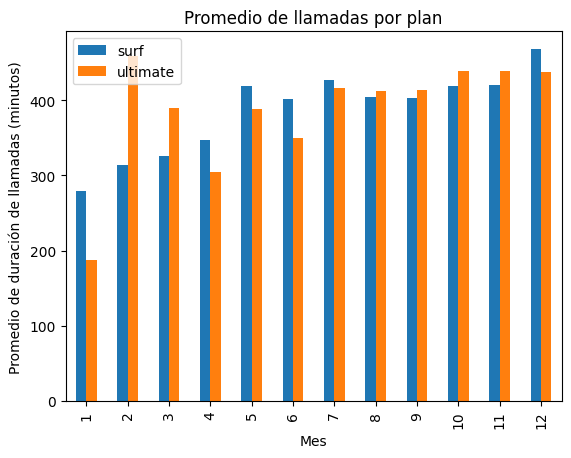

In [37]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Organizando información en pivot_table
pivot_calls=df.pivot_table(index="month",
                           columns="plan",
                           values="min_per_month",
                           aggfunc="mean"
                          )
print(pivot_calls)

# Generando gráfico con información organizada
pivot_calls.plot(kind="bar",
                 title="Promedio de llamadas por plan",
                 xlabel="Mes",
                 ylabel="Promedio de duración de llamadas (minutos)"
)
plt.legend(['surf', 'ultimate'])
plt.show()

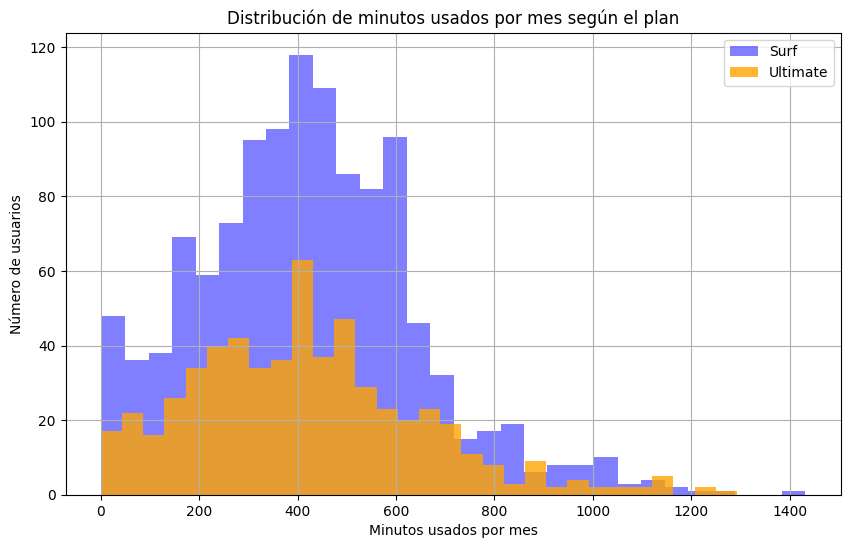

In [38]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Tamaño de figura
plt.figure(figsize=(10, 6))

# Histograma de minutos usados para el plan "surf"
plt.hist(df[df['plan'] == 'surf']['min_per_month'], bins=30, alpha=0.5, label='Surf', color='blue')

# Histograma de minutos usados para el plan "ultimate"
plt.hist(df[df['plan'] == 'ultimate']['min_per_month'], bins=30, alpha=0.8, label='Ultimate', color='orange')

# Configuración del gráfico
plt.title("Distribución de minutos usados por mes según el plan")
plt.xlabel("Minutos usados por mes")
plt.ylabel("Número de usuarios")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

In [39]:
# Calcula la media y la varianza de la duración mensual de llamadas.
df_statistics_calls=df.groupby(['month','plan'])['min_per_month'].agg(['mean','var'])
print(df_statistics_calls)

                      mean           var
month plan                              
1     surf      279.000000           NaN
      ultimate  188.000000  22449.000000
2     surf      313.800000  91044.200000
      ultimate  459.000000  58963.500000
3     surf      325.437500  38223.195833
      ultimate  390.000000  53302.666667
4     surf      346.742857  56222.490756
      ultimate  303.937500  36327.795833
5     surf      419.207547  55303.821480
      ultimate  387.904762  49428.190476
6     surf      402.000000  43175.275362
      ultimate  350.081081  35365.409910
7     surf      426.921348  57896.186925
      ultimate  416.446809  72303.904718
8     surf      404.689076  48235.809286
      ultimate  412.000000  52799.857143
9     surf      402.489796  41693.963936
      ultimate  413.591549  57081.187928
10    surf      418.132597  46581.160098
      ultimate  439.238636  51259.884927
11    surf      419.403670  44590.057498
      ultimate  438.960784  58646.117259
12    surf      

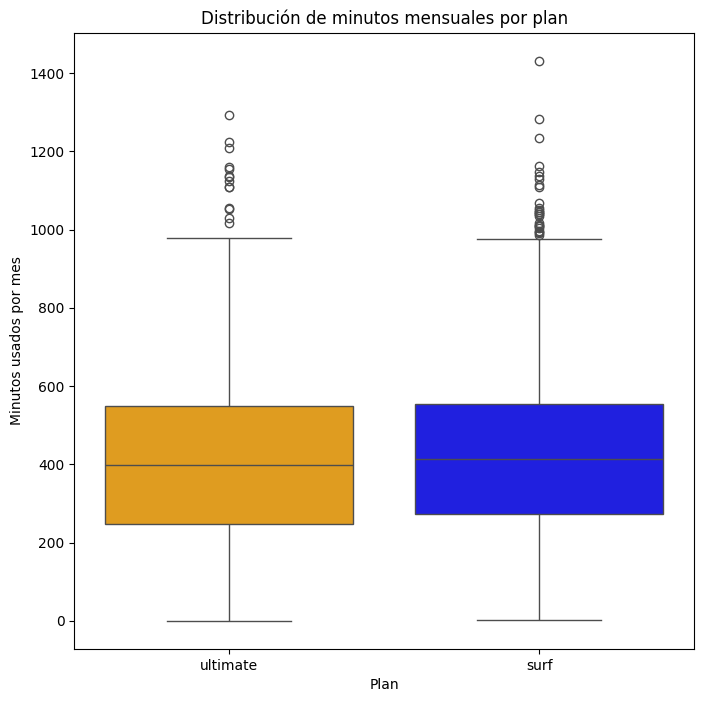

In [59]:
# Graficando distribución de duración mensual de llamadas en diagrama de caja
plt.figure(figsize=(8,8))
sns.boxplot(x='plan',y='min_per_month',data=df, hue='plan', palette={'surf':'blue','ultimate':'orange'})

# Configurando gráfica
plt.title("Distribución de minutos mensuales por plan")
plt.xlabel("Plan")
plt.ylabel("Minutos usados por mes")


plt.show()

***Conclusiones Llamadas:***
Al visualizar el gráfico de caja, se observa que los cuartiles del plan "Surf" son ligeramente superiores a los del plan "Ultimate", lo que indica una pequeña diferencia en el uso promedio, con los usuarios de Surf tendiendo a usar un poco más de minutos. Sin embargo, hay una mayor frecuencia de puntos atípicos (valores anómalos) en el plan "Surf". Dichos puntos anómalos podrían ser un objetivo para una campaña de marketing, invitándolos a considerar el plan "Ultimate", ya que pagarían una mejor tarifa por los minutos consumidos en exceso.

### **4.2. Comportamiento de Mensajes**

Se comparará el número promedio de mensajes enviados por cada plan y por cada mes, visualizando los datos y calculando estadísticas clave.

plan        surf   ultimate
month                      
1      21.000000  20.666667
2      21.600000  27.800000
3      21.937500  34.714286
4      24.685714  28.937500
5      33.547170  44.333333
6      32.742857  37.135135
7      34.786517  41.212766
8      37.302521  47.929825
9      38.585034  45.901408
10     41.475138  47.488636
11     40.087156  47.656863
12     47.686992  53.744000


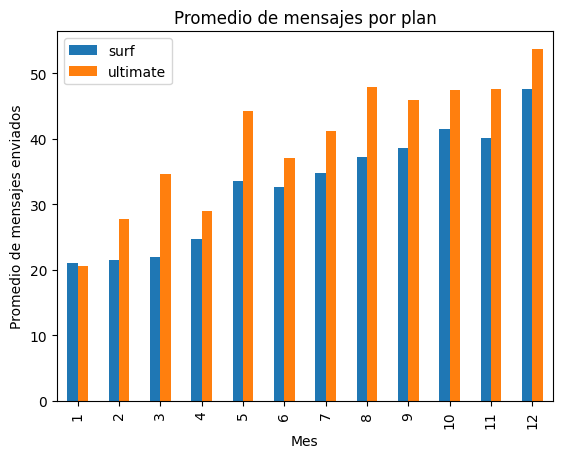

In [41]:
# Compara el número promedio de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Organizando información en pivot_table
pivot_msgs=df.pivot_table(index="month",
                           columns="plan",
                           values="msg_per_month",
                           aggfunc="mean"
                          )
print(pivot_msgs)

# Generando gráfico con información organizada
pivot_msgs.plot(kind="bar",
                 title="Promedio de mensajes por plan",
                 xlabel="Mes",
                 ylabel="Promedio de mensajes enviados"
)
plt.legend(['surf', 'ultimate'])
plt.show()


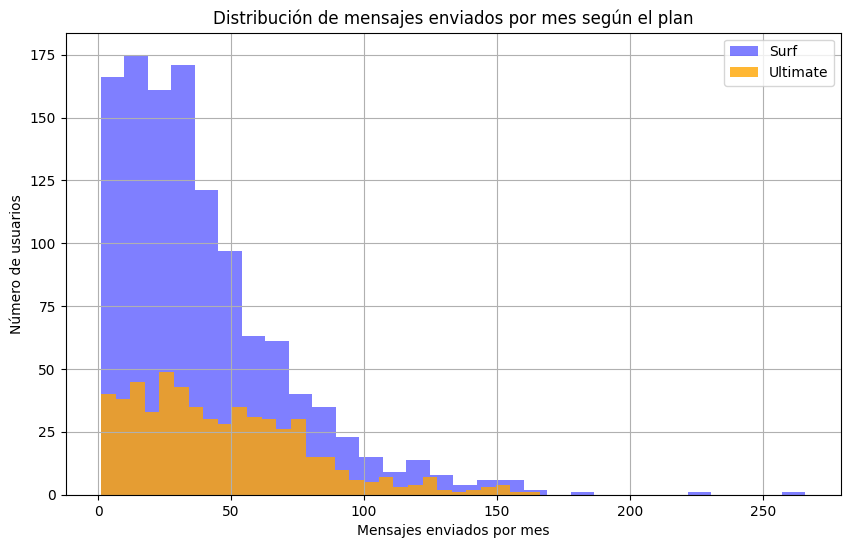

In [42]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Tamaño de figura
plt.figure(figsize=(10, 6))

# Histograma de minutos usados para el plan "surf"
plt.hist(df[df['plan'] == 'surf']['msg_per_month'], bins=30, alpha=0.5, label='Surf', color='blue')

# Histograma de minutos usados para el plan "ultimate"
plt.hist(df[df['plan'] == 'ultimate']['msg_per_month'], bins=30, alpha=0.8, label='Ultimate', color='orange')

# Configuración del gráfico
plt.title("Distribución de mensajes enviados por mes según el plan")
plt.xlabel("Mensajes enviados por mes")
plt.ylabel("Número de usuarios")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

In [43]:
# Calcula la media y la varianza de los mensajes enviados.
df_statistics_msgs=df.groupby(['month','plan'])['msg_per_month'].agg(['mean','var'])
print(df_statistics_msgs)

                     mean          var
month plan                            
1     surf      21.000000          NaN
      ultimate  20.666667   310.333333
2     surf      21.600000   512.800000
      ultimate  27.800000   529.700000
3     surf      21.937500   352.062500
      ultimate  34.714286   613.904762
4     surf      24.685714   539.751261
      ultimate  28.937500   512.862500
5     surf      33.547170   888.675617
      ultimate  44.333333  1246.933333
6     surf      32.742857   818.077847
      ultimate  37.135135   801.731231
7     surf      34.786517   786.397089
      ultimate  41.212766   858.084181
8     surf      37.302521   951.128044
      ultimate  47.929825  1034.387845
9     surf      38.585034   897.463610
      ultimate  45.901408   903.375855
10    surf      41.475138  1199.439656
      ultimate  47.488636  1088.160789
11    surf      40.087156   951.858728
      ultimate  47.656863  1100.782081
12    surf      47.686992  1339.971014
      ultimate  53.744000

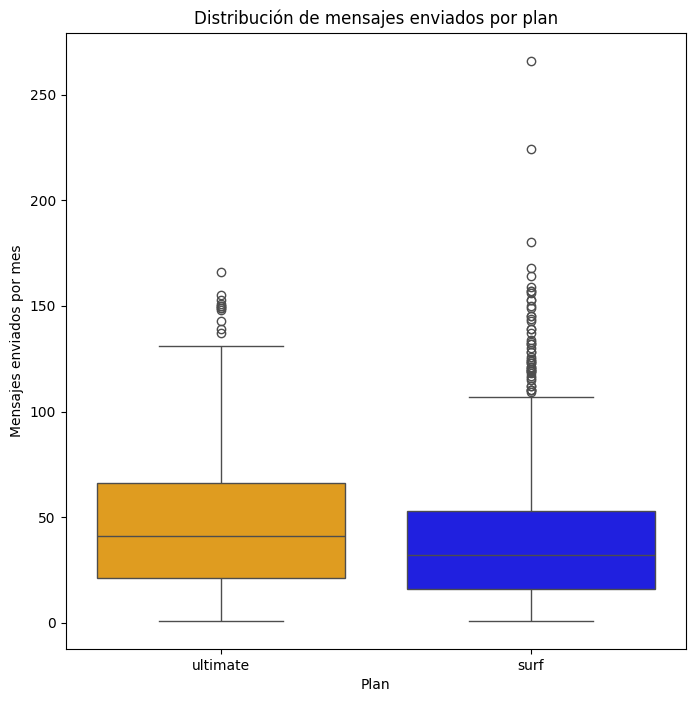

In [56]:
# Graficando distribución de mensajes enviados de manera mensual en diagrama de caja
plt.figure(figsize=(8,8))
sns.boxplot(x='plan',y='msg_per_month',data=df, hue='plan', palette={'surf':'blue','ultimate':'orange'})

# Configurando gráfica
plt.title("Distribución de mensajes enviados por plan")
plt.xlabel("Plan")
plt.ylabel("Mensajes enviados por mes")


plt.show()

***Conclusiones Mensajes:***

El comportamiento de los mensajes enviados varía conforme al plan tarifario del usuario. Se observa la tendencia de que, en el plan "Ultimate", los usuarios envían una mayor cantidad de mensajes que en el plan "Surf". El plan "Surf" presenta una mayor cantidad de valores atípicos (anómalos), es decir, hay una mayor cantidad de usuarios con un alto volumen de mensajes enviados, los cuales podrían ser candidatos para una invitación al plan "Ultimate" para beneficiarse de una mejor tarifa. Se infiere a su vez, por los valores observados, que el 75% de los usuarios del plan Surf buscan no rebasar la barrera de los 50 mensajes enviados, ya que son los incluidos en su plan tarifario. En contraste, el plan "Ultimate", que incluye 1,000 mensajes, no muestra un aumento considerable en los mensajes enviados a comparación del plan "Surf", lo que sugiere que el límite superior es raramente alcanzado.

### **4.3. Comportamiento de Internet**
Se comparará el promedio de GB usados por cada plan y por cada mes, visualizando los datos y calculando estadísticas clave.

plan        surf   ultimate
month                      
1       8.000000   7.333333
2       9.400000  17.400000
3      12.625000  23.857143
4      12.085714  14.500000
5      15.056604  17.238095
6      15.771429  15.513514
7      16.808989  16.638298
8      17.252101  18.000000
9      16.612245  16.464789
10     17.524862  17.636364
11     16.389908  17.401961
12     18.089431  18.352000


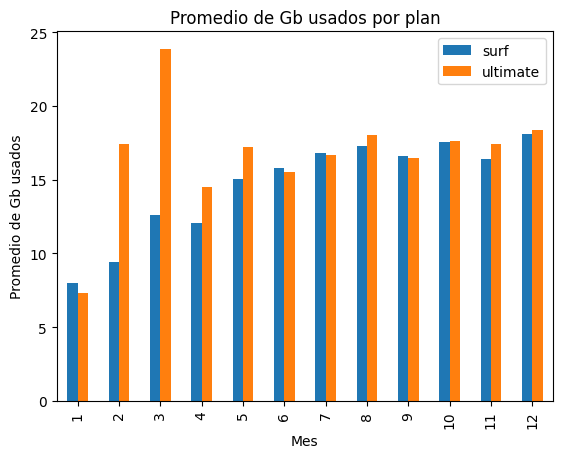

In [45]:
# Compara el promedio de Gb usados que tienden consumir los usuarios de cada plan
# Organizando información en pivot_table
pivot_int=df.pivot_table(index="month",
                           columns="plan",
                           values="gb_used",
                           aggfunc="mean"
                          )
print(pivot_int)

# Generando gráfico con información organizada
pivot_int.plot(kind="bar",
                 title="Promedio de Gb usados por plan",
                 xlabel="Mes",
                 ylabel="Promedio de Gb usados"
)
plt.legend(['surf', 'ultimate'])
plt.show()


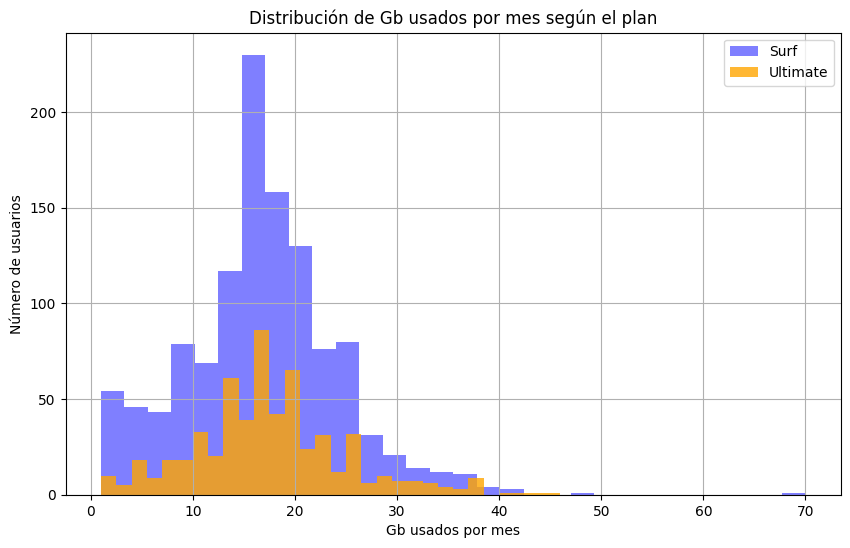

In [46]:
# Tamaño de figura
plt.figure(figsize=(10, 6))

# Histograma de Gb usados para el plan "surf"
plt.hist(df[df['plan'] == 'surf']['gb_used'], bins=30, alpha=0.5, label='Surf', color='blue')

# Histograma de Gb usados para el plan "ultimate"
plt.hist(df[df['plan'] == 'ultimate']['gb_used'], bins=30, alpha=0.8, label='Ultimate', color='orange')

# Configuración del gráfico
plt.title("Distribución de Gb usados por mes según el plan")
plt.xlabel("Gb usados por mes")
plt.ylabel("Número de usuarios")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

In [47]:
# Calcula la media y la varianza de internet consumido
df_statistics_int=df.groupby(['month','plan'])['gb_used'].agg(['mean','var'])
print(df_statistics_int)

                     mean         var
month plan                           
1     surf       8.000000         NaN
      ultimate   7.333333   22.333333
2     surf       9.400000   32.300000
      ultimate  17.400000   48.800000
3     surf      12.625000   51.983333
      ultimate  23.857143  104.142857
4     surf      12.085714   56.845378
      ultimate  14.500000   86.266667
5     surf      15.056604   55.285196
      ultimate  17.238095   55.990476
6     surf      15.771429   52.236853
      ultimate  15.513514   71.590090
7     surf      16.808989   63.406282
      ultimate  16.638298   67.061980
8     surf      17.252101   62.529127
      ultimate  18.000000   54.035714
9     surf      16.612245   46.088342
      ultimate  16.464789   40.766600
10    surf      17.524862   56.528545
      ultimate  17.636364   52.785789
11    surf      16.389908   49.953262
      ultimate  17.401961   54.005145
12    surf      18.089431   61.159316
      ultimate  18.352000   52.520258


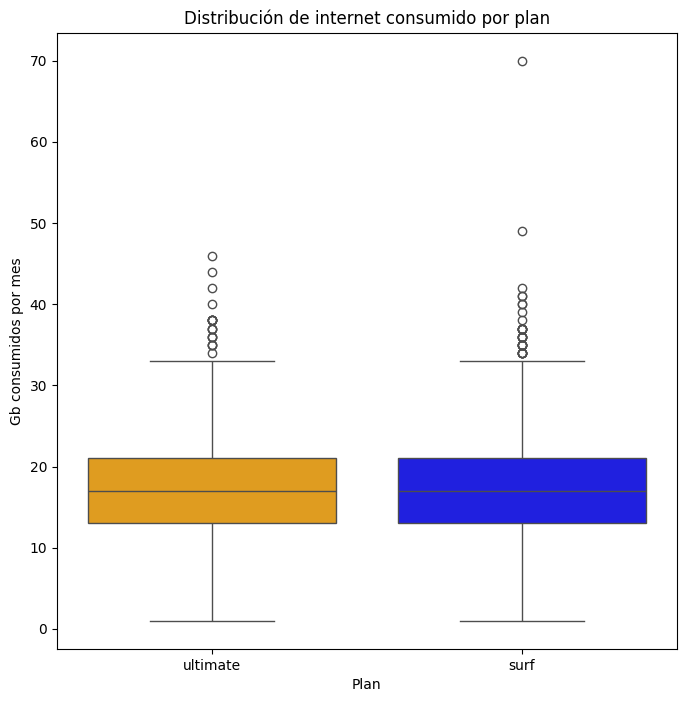

In [57]:
# Graficando distribución de mensajes enviados de manera mensual en diagrama de caja
plt.figure(figsize=(8,8))
sns.boxplot(x='plan',y='gb_used',data=df, hue='plan', palette={'surf':'blue','ultimate':'orange'})

# Configurando gráfica
plt.title("Distribución de internet consumido por plan")
plt.xlabel("Plan")
plt.ylabel("Gb consumidos por mes")


plt.show()

***Conclusiones Internet:***

 Al graficar el comportamiento del consumo de internet por plan, no se observan diferencias notables a primera vista, más que en el plan "Surf" se presenta un valor anómalo superior al mayor valor anómalo observado en el plan "Ultimate". Es importante recordar que el plan "Surf" y "Ultimate" incluyen 15 y 30 GB mensuales respectivamente. Por lo que gran parte de los usuarios del plan "Surf" se exceden en el consumo de internet incluido en su plan, a diferencia del plan "Ultimate", donde solo un pequeño porcentaje sobrepasa dicho límite.

### **5. Análisis de Ingresos por Plan**

Se analizará el ingreso total promedio por cada plan y por cada mes, y se visualizará la distribución de ingresos.

plan        surf   ultimate
month                      
1      20.000000  70.000000
2      23.668000  70.000000
3      38.326875  78.000000
4      40.267429  73.062500
5      50.370943  71.000000
6      51.754429  72.081081
7      61.358090  72.382979
8      64.019832  72.456140
9      56.858299  71.380282
10     64.982983  72.147727
11     56.721239  72.127451
12     68.289390  72.744000


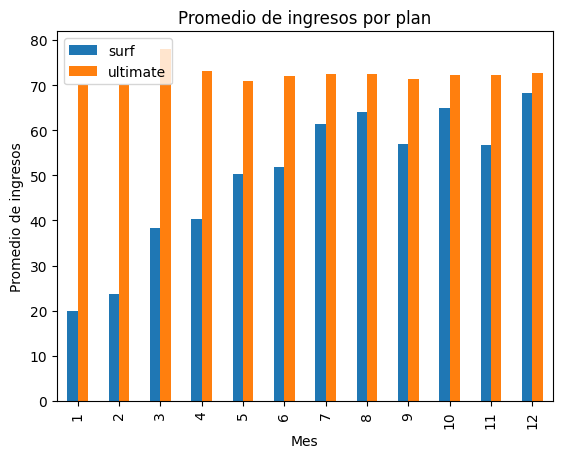

In [49]:
# Compara el promedio de ingresos de cada plan
# Organizando información en pivot_table
pivot_rev=df.pivot_table(index="month",
                           columns="plan",
                           values="total_revenue",
                           aggfunc="mean"
                          )
print(pivot_rev)

# Generando gráfico con información organizada
pivot_rev.plot(kind="bar",
                 title="Promedio de ingresos por plan",
                 xlabel="Mes",
                 ylabel="Promedio de ingresos"
)
plt.legend(['surf', 'ultimate'])
plt.show()


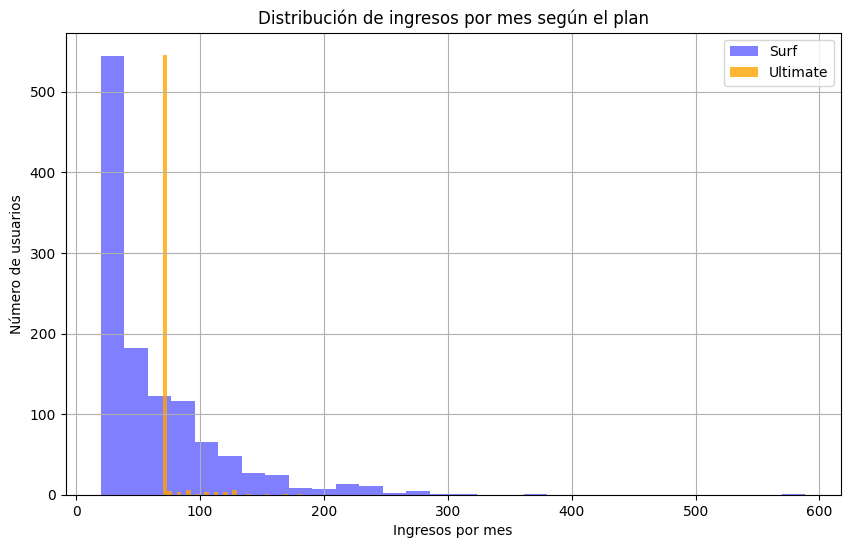

In [50]:
# Tamaño de figura
plt.figure(figsize=(10, 6))

# Histograma de Gb usados para el plan "surf"
plt.hist(df[df['plan'] == 'surf']['total_revenue'], bins=30, alpha=0.5, label='Surf', color='blue')

# Histograma de Gb usados para el plan "ultimate"
plt.hist(df[df['plan'] == 'ultimate']['total_revenue'], bins=30, alpha=0.8, label='Ultimate', color='orange')

# Configuración del gráfico
plt.title("Distribución de ingresos por mes según el plan")
plt.xlabel("Ingresos por mes")
plt.ylabel("Número de usuarios")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

In [51]:
# Calcula la media y la varianza de ingresos por plan
df_statistics_rev=df.groupby(['month','plan'])['total_revenue'].agg(['mean','var'])
print(df_statistics_rev)

                     mean          var
month plan                            
1     surf      20.000000          NaN
      ultimate  70.000000     0.000000
2     surf      23.668000    25.571120
      ultimate  70.000000     0.000000
3     surf      38.326875   539.762356
      ultimate  78.000000   235.666667
4     surf      40.267429  1250.889249
      ultimate  73.062500   150.062500
5     surf      50.370943  2291.145093
      ultimate  71.000000    21.000000
6     surf      51.754429  2414.229045
      ultimate  72.081081    94.909910
7     surf      61.358090  3244.916613
      ultimate  72.382979   130.545791
8     surf      64.019832  3316.950283
      ultimate  72.456140   126.859649
9     surf      56.858299  2019.515020
      ultimate  71.380282    52.667606
10    surf      64.982983  3033.353233
      ultimate  72.147727   178.380225
11    surf      56.721239  2196.379701
      ultimate  72.127451   117.201417
12    surf      68.289390  3959.152456
      ultimate  72.744000

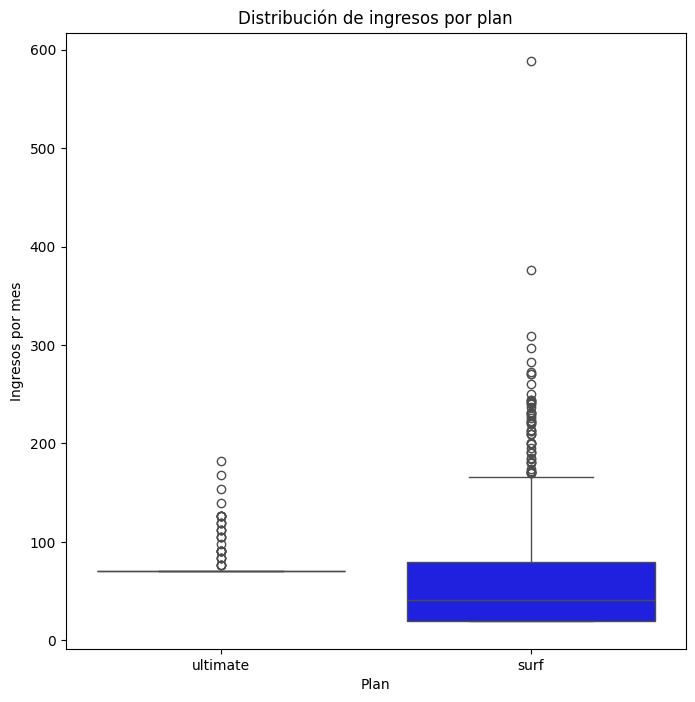

In [58]:
# Graficando distribución de mensajes enviados de manera mensual en diagrama de caja
plt.figure(figsize=(8,8))
sns.boxplot(x='plan',y='total_revenue',data=df, hue='plan', palette={'surf':'blue','ultimate':'orange'})

# Configurando gráfica
plt.title("Distribución de ingresos por plan")
plt.xlabel("Plan")
plt.ylabel("Ingresos por mes")


plt.show()

***Conclusiones Ingreso:***

Al observar el gráfico de caja sobre los ingresos por plan, se observa que una gran proporción de los usuarios del plan "Ultimate" pagan 70 dólares mensuales, con la presencia de valores atípicos que representan usuarios con tarifas por encima de lo establecido debido al consumo extra. Mientras que en el plan "Surf", es común que los usuarios rebasen el límite de lo que incluye su plan tarifario, provocando costos adicionales, y el 75% de los usuarios paga por debajo de los 70 dólares al mes. Se observa también una mayor frecuencia y costo de usuarios con tarifas que exceden los 170 dólares en el plan "Surf". Esto indica que, a pesar de su menor costo base, el plan Surf puede generar ingresos adicionales significativos debido a los cargos por uso excedente.

### **6. Prueba de Hipótesis Estadística**

Se realizarán pruebas de hipótesis para determinar si existen diferencias significativas en los ingresos entre los planes tarifarios y entre los usuarios de diferentes regiones.

#### **6.1. Prueba de Hipótesis: Ingresos de Planes Surf y Ultimate**
- Hipótesis Nula (`H_0`): Los ingresos promedio de los planes Surf y Ultimate son iguales.
- Hipótesis Alternativa (`H_1`): Los ingresos promedio de los planes Surf y Ultimate son distintos.

Se utilizará una `prueba t de Student` para dos muestras independientes. Primero, se evaluará la igualdad de varianzas con la `prueba de Levene`. 

In [53]:
# Agrupando ingresos por plan
df_rev_ult=df[df['plan']=='ultimate']['total_revenue']
df_rev_surf=df[df['plan']=='surf']['total_revenue']
 
# Definiendo alpha
alpha= 0.05

# Determinando si las varianzas son iguales o distintas a través de st.levene()
w_stats , p_value = levene(df_rev_ult,df_rev_surf, center='mean')
print("Valor de p: ", p_value)
if p_value > alpha:
    print("No rechazamos la hipótesis nula, es decir, las varianzas son iguales")
else:
    print("Rechazamos la hipótesis nula, es decir, las varianzas no son iguales")

Valor de p:  1.0606340498204233e-97
Rechazamos la hipótesis nula, es decir, las varianzas no son iguales


In [54]:
# Realizamos planteamiento de prueba para ingresos de planes tarifarios Ultimate y Surf
print("Ho= Los ingresos por plan son iguales \nH1= Los ingresos por plan son distintos")

result_rev=st.ttest_ind(df_rev_ult, df_rev_surf, equal_var=False)

# Valor p obtenido
print("Valor p:", result_rev.pvalue)

# Resultado
if result_rev.pvalue > alpha:
    print("No rechazamos la hipótesis nula, es decir, los ingresos por plan son iguales")
else:
    print("Rechazamos la hipótesis nula, es decir, los ingresos por plan son distintos")


Ho= Los ingresos por plan son iguales 
H1= Los ingresos por plan son distintos
Valor p: 8.316536255298574e-14
Rechazamos la hipótesis nula, es decir, los ingresos por plan son distintos


#### **6.2. Prueba de Hipótesis: Ingresos por Región (NY-NJ vs. Otras Regiones)**

- Hipótesis Nula (`H_0`): El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.
- Hipótesis Alternativa (`H_1`): El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Se utilizará una `prueba t de Student` para dos muestras independientes, asumiendo varianzas desiguales.

In [55]:
# Prueba las hipótesis
# Combinando df con users para extraer la ciudad
df_merge_city=df.merge(users[['user_id','city']], on="user_id", how="left") 
df_region= df_merge_city[df_merge_city['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue']
df_other_region=df_merge_city[df_merge_city['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue']

# Realizamos planteamiento de prueba para ingresos del área de NY-NJ en comparación con otras regiones
print("Ho= Los ingresos entre las región NY-NJ y otras regiones son iguales \nH1= Los ingresos de la región de NY-NJ y otras regiones son distintos")

result_reg_rev=st.ttest_ind(df_region, df_other_region, equal_var=False)

# Valor p obtenido
print("Valor p:", result_reg_rev.pvalue)

# Resultado
if result_reg_rev.pvalue > alpha:
    print("No rechazamos la hipótesis nula, es decir, los ingresos entre las regiones NY-NJ y otras regiones son iguales")
else:
    print("Rechazamos la hipótesis nula, es decir, los ingresos entre las regiones NY-NJ y otras regiones son distintos")


Ho= Los ingresos entre las región NY-NJ y otras regiones son iguales 
H1= Los ingresos de la región de NY-NJ y otras regiones son distintos
Valor p: 0.004028282730393426
Rechazamos la hipótesis nula, es decir, los ingresos entre las regiones NY-NJ y otras regiones son distintos


### **7. Conclusión General**

En esta sección final, se enumerarán las conclusiones importantes del análisis, abarcando todas las decisiones clave y los hallazgos que determinaron la forma elegida para procesar y analizar los datos.

**Conclusiones:**

1. **Importancia de la Preparación de Datos:** Es fundamental relacionar correctamente las diferentes tablas y DataFrames, limpiar valores ausentes, colocar el formato correcto y filtrar los datos conforme a los intereses del análisis. Un preprocesamiento meticuloso garantiza la fiabilidad de los insights.

2. **Distribuciones de Consumo e Ingresos por Plan:**

    - El plan tarifario "Surf", al ser el más barato, es el más atractivo para un gran porcentaje de usuarios. Sin embargo, al ser más limitado en sus prestaciones (minutos, mensajes, internet), es más propenso a generar cargos extra por excedentes. Esto provoca **márgenes de ganancia significativos** para la compañía, ya que muchos usuarios superan los límites.
    - Por el contrario, el plan "Ultimate", al ser más generoso en sus prestaciones a un coste mensual mayor, **desincentiva al consumidor a rebasar los límites**, lo que resulta en una menor frecuencia de costes extra. Esto sugiere que el plan Ultimate genera ingresos más predecibles y estables, pero con menor potencial de ingresos adicionales por excedentes en comparación con Surf.

3. **Resultados de las Pruebas de Hipótesis:**

    - **Comparación de Ingresos por Plan (Surf vs. Ultimate):** La prueba de hipótesis reveló que los planes tarifarios "Surf" y "Ultimate" **presentan un comportamiento distinto en cuanto a los ingresos que generan.** Esto significa que uno de los planes es, en promedio, más rentable que el otro, y es crucial para Megaline comprender cuál. (Se espera que el plan Surf sea más rentable debido a los excedentes, aunque esto se confirmaría con el valor p específico).
    - **Comparación de Ingresos por Región (NY-NJ vs. Otras Regiones):**  La prueba de hipótesis sobre los ingresos entre la región de Nueva York-Nueva Jersey (NY-NJ) y otras regiones mostró un **valor p de 0.004**, lo que es menor que el nivel de significancia (0.05). Por lo tanto, **rechazamos la hipótesis nula**, concluyendo que los **ingresos promedio de los usuarios del área NY-NJ son significativamente distintos a los de los usuarios de otras regiones.**
